# Text Classification

텍스트 분류는 자연어 처리의 일종으로, 텍스트에 레이블 또는 클래스를 지정하는 작업이며, 다양한 실용적인 응용 분야에서 텍스트 분류사용한다.

가장 많이 사용되는 텍스트 분류 사례들 중 하나는 감성 분석으로, 텍스트 시퀀스에 🙂긍정, 🙁부정과 같은 label을 지정해 분류한다..

이 강의자료에서 학습할 내용은:

1. [IMDb](https://huggingface.co/datasets/imdb) 데이터셋을 이용해, 오픈소스로 공유된 [사전학습 모델](https://huggingface.co/models)을 이용해 영화 리뷰가 긍정적인지 부정적인지 판단합니다.
2. 이 강의자료에서는 DistillBest 기반의 사전학습모델을 사용합니다. [jzonthemtn/distilbert-imdb](https://huggingface.co/jzonthemtn/distilbert-imdb)

## 0 라이브러리 설치

#### Huggingface의 transformer, datasets, evaluate 라이브러리 활용.

In [1]:
! pip install transformers datasets evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

#### Hugging Face 로그인하기

사전에 [Hugging Face](https://huggingface.co/) 가입이 필요하다.

로그인 후 [세팅](https://huggingface.co/settings/tokens)에서 Access Tokens를 발급받는다.

Token을 발급할 때 Permissions는 Repositories와 Inference의 권한들만 전부 활성화해준다.

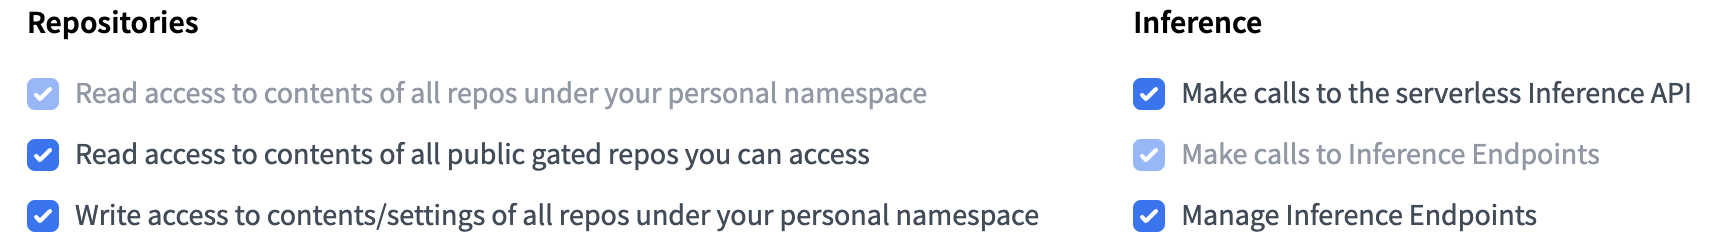

발급받은 토큰은 유출에 주의하되, 재조회가 까다로우니 반드시 __개인적인 공간__에 저장해둔다.

In [5]:
from huggingface_hub import notebook_login

notebook_login()

###1 Dataset


#### IMDB(영화사이트 리뷰) Dataset 가져오기.
Dataset [참조논문](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)

In [6]:
from datasets import load_dataset

imdb = load_dataset('imdb')

#### 첫 번째 데이터 출력해보기 - 데이터 형태는 Dictionary({key:value})
* text: 리뷰 텍스트 리스트
* label: 사람이 직접 분류한 정답 label(0: 부정, 1: 긍정) 리스트

In [7]:
imdb['test'][0:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

## 2 사전 학습 모델을 이용한 추론

#### 사전 학습된 모델 불러오기.

In [8]:
model_name = 'jzonthemtn/distilbert-imdb'
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

#### 간단한 예시 추론해보기.

`pipeline()`를 이용하면 편리하다.

`device = 0`은 GPU를 사용할 때 입력하는 인자이다.

`sentiment-analysis`는 pipeline 이름을 임의로 정한것이다.

In [9]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model=model_name, device=0)
text = "This was a masterpiece. Not completely faithful to the books, but enthralling from beginning to end. Might be my favorite of the three."
#text = "This was so bad!"
#text = "This was so good!"
classifier(text)

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'LABEL_1', 'score': 0.9958142638206482}]

## 3 모델 평가하기

#### Evaluate 라이브러리 활용.

In [10]:
import evaluate

accuracy = evaluate.load('accuracy')

import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

#### Test dataset으로 부터 임의의 샘플을 random하게 추출하고, 이를 이용해 평가한다.

In [13]:
test_list = imdb['test']
test_sample_size = 20
rng = np.random.default_rng()
random_indices = rng.choice(len(test_list), size=test_sample_size, replace=False)
sampled_data = test_list.select(random_indices)

test_predictions = classifier(sampled_data['text'], max_length=512, truncation=True)
predicted_labels = [label['label'] for label in test_predictions]
mapped_labels = [model.config.label2id[label] for label in predicted_labels]
reference_labels = sampled_data['label']
print(accuracy.compute(predictions=mapped_labels, references=reference_labels))
print(reference_labels)
print(mapped_labels)

{'accuracy': 0.95}
[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0]


## 4 Assignment

#### a) Hugging Face에 공개된 다양한 사전학습 모델들을 바꿔가며 비교해본다.
#### b) 다른 Dataset을 이용한 한글 문장 분류 모델을 찾아보고, 임의로 Test dataset을 만들어 평가해본다.
